1. Import libraries 

In [17]:
# Import libraries
import pandas as pd
import numpy as np

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
# Load dataset
ds = pd.read_csv("car data.csv")

In [20]:
ds.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [21]:
# Drop Car_Name as it's not useful for prediction
ds.drop('Car_Name', axis=1, inplace=True)

2. Feature engineering

In [23]:
# Feature engineering: Calculate the age of the car
ds['Car_Age'] = 2025 - ds['Year']
ds.drop('Year', axis=1, inplace=True)

3. categorical features

In [28]:
# One-hot encode categorical features
ds = pd.get_dummies(ds, columns=["Fuel_Type", "Selling_type", "Transmission"], drop_first=True)

4. Split data

In [29]:
# Split data
X = ds.drop("Selling_Price", axis=1)
y = ds["Selling_Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Train model

In [30]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

6. Prediction and evaluation

In [31]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R² Score: 0.8488707839193155
RMSE: 1.8658375680942367


C:\Users\binte\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


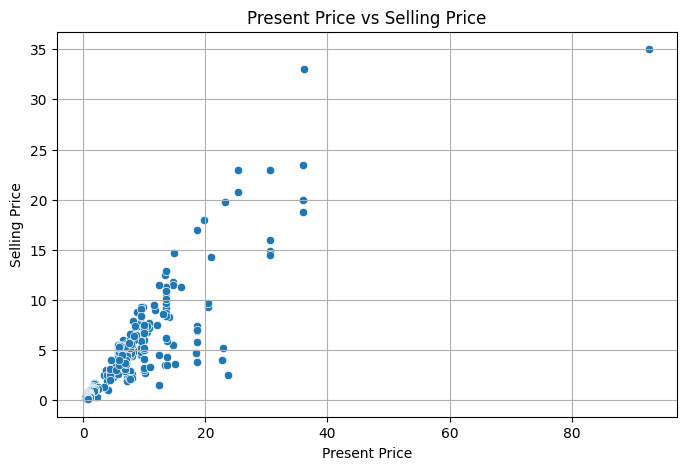

In [32]:
# 2. Scatter plot: Present Price vs Selling Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=ds)
plt.title("Present Price vs Selling Price")
plt.xlabel("Present Price")
plt.ylabel("Selling Price")
plt.grid(True)
plt.show()

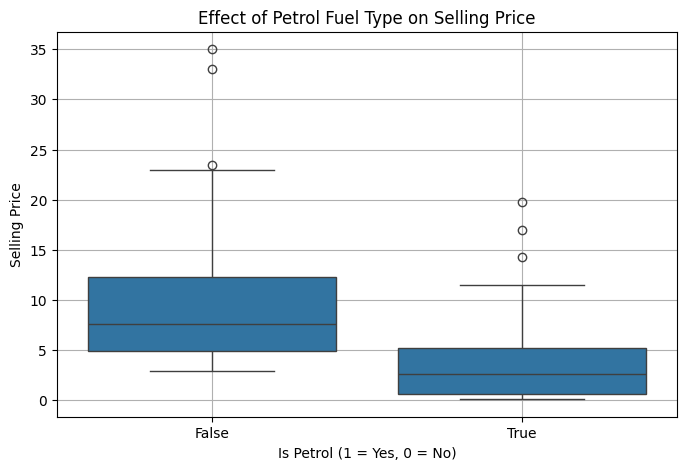

In [34]:
# 3. Boxplot: Fuel Type (Petrol) vs Selling Price
plt.figure(figsize=(8, 5))
sns.boxplot(x='Fuel_Type_Petrol', y='Selling_Price', data=ds)
plt.title("Effect of Petrol Fuel Type on Selling Price")
plt.xlabel("Is Petrol (1 = Yes, 0 = No)")
plt.ylabel("Selling Price")
plt.grid(True)
plt.show()